In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df= pd.read_csv('/Users/zoezhu/Downloads/output.csv')

In [8]:
df.head(10)

,host_response_rate,host_identity_verified,host_total_listings_count,city,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,...,bed_type,amenities,price,minimum_nights,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,reviews_per_month,fraud
0,90,1,6,1,1,0,1,1,1.0,1.0,...,4,547,4000,7,34,90.0,0,2,0.38,0
1,100,1,7,2,1,8,1,2,1.0,1.0,...,4,1158,14500,3,36,91.0,0,2,0.40,0
2,100,1,7,2,1,0,0,4,1.0,1.0,...,4,2016,19500,3,47,95.0,0,2,0.54,1
3,100,1,1,2,1,0,1,2,1.0,1.0,...,4,964,6500,3,41,98.0,0,1,0.47,0
4,100,0,12,2,1,0,0,3,1.0,1.0,...,4,1794,15400,30,18,91.0,0,1,0.21,0
5,94,0,5,2,1,0,0,4,2.0,2.0,...,4,1519,22500,3,13,100.0,0,3,0.18,1
6,89,1,558,2,1,0,0,2,1.0,1.0,...,4,1573,22900,2,9,89.0,0,3,0.15,0
7,89,1,558,2,1,0,0,2,1.0,1.0,...,4,131,20900,2,22,78.0,0,3,0.35,0
8,89,1,558,2,1,0,0,3,1.0,1.0,...,4,1135,25900,4,3,90.0,0,3,0.04,0
9,89,1,558,2,1,0,0,4,1.0,2.0,...,4,1299,34200,2,21,87.0,0,3,0.35,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   host_response_rate         3585 non-null   int64  
 1   host_identity_verified     3585 non-null   int64  
 2   host_total_listings_count  3585 non-null   int64  
 3   city                       3585 non-null   int64  
 4   is_location_exact          3585 non-null   int64  
 5   property_type              3585 non-null   int64  
 6   room_type                  3585 non-null   int64  
 7   accommodates               3585 non-null   int64  
 8   bathrooms                  3585 non-null   float64
 9   bedrooms                   3585 non-null   float64
 10  beds                       3585 non-null   float64
 11  bed_type                   3585 non-null   int64  
 12  amenities                  3585 non-null   int64  
 13  price                      3585 non-null   int64

Problem Statement: Predict if an Airbnb listing is fraudulent based on various listing features.

Hypothesis: The likelihood of a listing being fraudulent is influenced by factors such as host response rate, host identity verification, property type, price, number of reviews, and review rating.

In [10]:
#Descriptive statistics
df.describe(include='all')

,host_response_rate,host_identity_verified,host_total_listings_count,city,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,...,bed_type,amenities,price,minimum_nights,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,reviews_per_month,fraud
count,3585.00000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,...,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000
mean,95.64742,0.726081,58.902371,2.820363,0.859135,1.873361,0.429010,3.041283,1.220781,1.255230,...,3.909902,1570.437378,17392.580195,3.171269,19.044630,93.749791,0.165690,1.210042,1.766165,0.213947
std,11.78841,0.446030,171.119663,4.071361,0.347930,3.327397,0.538211,1.778929,0.500698,0.752129,...,0.511011,873.197307,14833.132129,8.874133,35.571658,9.039049,0.371854,0.877998,1.924877,0.410147
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1000.000000,1.000000,0.000000,20.000000,0.000000,0.000000,0.010000,0.000000
25%,98.00000,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,...,4.000000,844.000000,8500.000000,1.000000,1.000000,91.000000,0.000000,0.000000,0.640000,0.000000
50%,100.00000,1.000000,2.000000,2.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,...,4.000000,1604.000000,15000.000000,2.000000,5.000000,97.000000,0.000000,1.000000,1.000000,0.000000
75%,100.00000,1.000000,7.000000,2.000000,1.000000,4.000000,1.000000,4.000000,1.000000,2.000000,...,4.000000,2280.000000,22000.000000,3.000000,21.000000,100.000000,0.000000,2.000000,2.130000,0.000000
max,100.00000,1.000000,749.000000,37.000000,1.000000,12.000000,2.000000,16.000000,6.000000,5.000000,...,4.000000,3091.000000,400000.000000,300.000000,404.000000,100.000000,1.000000,3.000000,19.150000,1.000000


Data Cleaning 

In [11]:
#check missing values
df.isnull().sum()

host_response_rate           0
host_identity_verified       0
host_total_listings_count    0
city                         0
is_location_exact            0
property_type                0
room_type                    0
accommodates                 0
bathrooms                    0
bedrooms                     0
beds                         0
bed_type                     0
amenities                    0
price                        0
minimum_nights               0
number_of_reviews            0
review_scores_rating         0
instant_bookable             0
cancellation_policy          0
reviews_per_month            0
fraud                        0
dtype: int64

In [12]:
df = df.drop_duplicates()

In [21]:
average_price = df.groupby(['city', 'property_type'])['price'].mean().sort_values(ascending=False)
average_price


city  property_type
31    8                45000.000000
11    0                32312.500000
0     0                29500.000000
2     7                28900.000000
      2                26883.333333
                           ...     
35    0                 5200.000000
6     0                 5000.000000
22    8                 5000.000000
34    8                 5000.000000
0     8                 3500.000000
Name: price, Length: 73, dtype: float64

As we can see these two steps,no missing value,and also drop duplicated data.

Data visualization part: to countinue analysis variables and further understand it.

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

/var/folders/fm/9pz_54hn7ynbrz17999wv77m0000gn/T/ipykernel_4969/927395899.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.host_response_rate, kde=False, color="g", ax=axes[0]).set_title('Host Response Rate Distribution')
/var/folders/fm/9pz_54hn7ynbrz17999wv77m0000gn/T/ipykernel_4969/927395899.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com

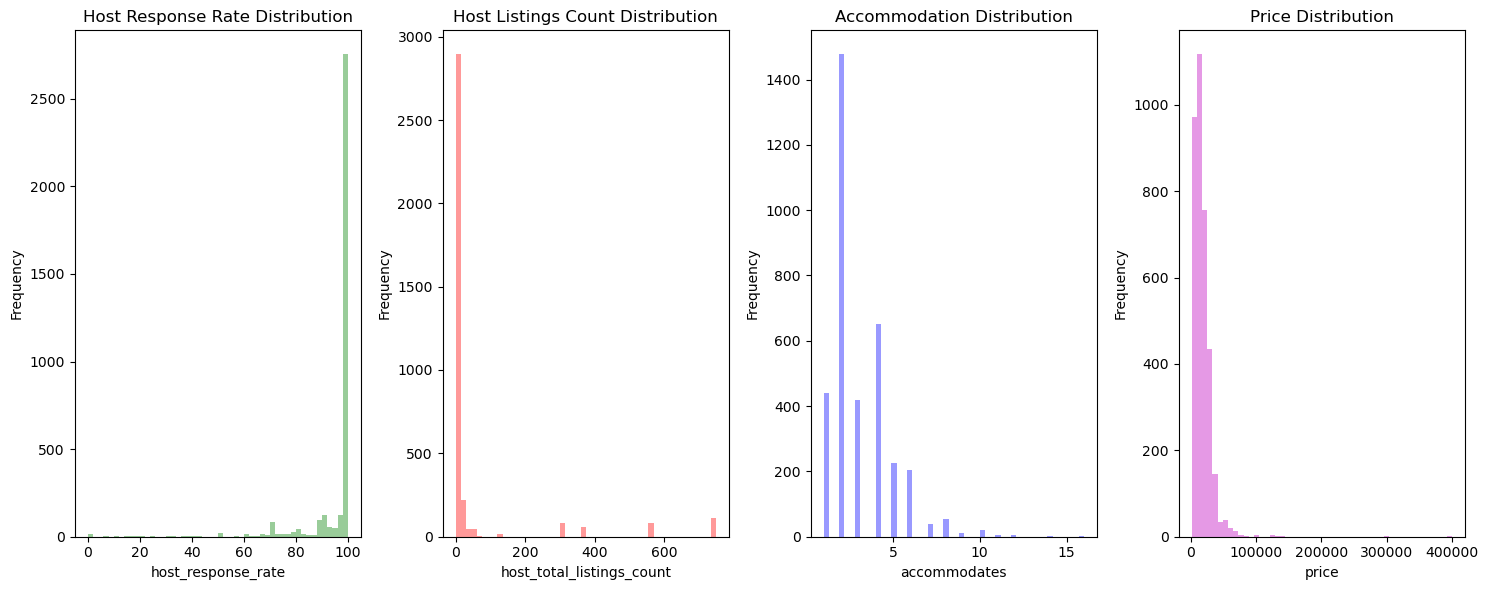

In [14]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols=4, figsize=(15, 6))

# Graph host_response_rate
sns.distplot(df.host_response_rate, kde=False, color="g", ax=axes[0]).set_title('Host Response Rate Distribution')
axes[0].set_ylabel('Frequency')

# Graph host_total_listings_count
sns.distplot(df.host_total_listings_count, kde=False, color="r", ax=axes[1]).set_title('Host Listings Count Distribution')
axes[1].set_ylabel('Frequency')

# Graph accommodates
sns.distplot(df.accommodates, kde=False, color="b", ax=axes[2]).set_title('Accommodation Distribution')
axes[2].set_ylabel('Frequency')

# Graph price
sns.distplot(df.price, kde=False, color="m", ax=axes[3]).set_title('Price Distribution')
axes[3].set_ylabel('Frequency')

plt.tight_layout()

In [16]:
# Correlation of variables with 'fraud'
correlation = df.corr()['fraud'].sort_values(ascending=False)

# Display correlation
correlation



fraud                        1.000000
number_of_reviews            0.532263
reviews_per_month            0.321267
cancellation_policy          0.108328
host_identity_verified       0.097983
instant_bookable             0.087338
host_response_rate           0.075115
accommodates                 0.039517
is_location_exact            0.035545
property_type                0.034360
beds                         0.021478
amenities                    0.007541
bathrooms                    0.002031
room_type                    0.000777
bedrooms                    -0.008856
city                        -0.014158
bed_type                    -0.020258
minimum_nights              -0.034821
price                       -0.051955
host_total_listings_count   -0.085581
review_scores_rating        -0.245719
Name: fraud, dtype: float64

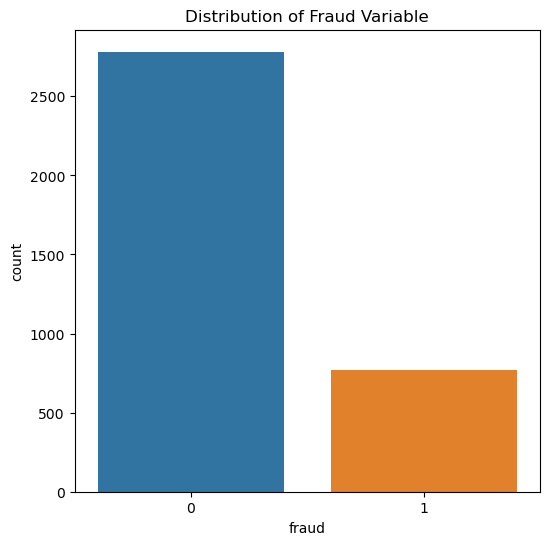

In [18]:
# Countplot for fraud variable
plt.figure(figsize=(6,6))
sns.countplot(data=df, x='fraud')
plt.title('Distribution of Fraud Variable')
plt.show()

The count plot shows that there are more non-fraudulent listings (represented by 0) than fraudulent listings (represented by 1) in the dataset. This is a common scenario in fraud detection problems, where the majority class (non-fraud) is usually much larger than the minority class (fraud).